# Importing Packages

In [3]:
# Install Packages
!pip install plotly
!pip install xgboost

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data preprocessing and imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Model evaluation and cross-validation
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Machine learning models
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [4]:
# Set Pandas display options to show all columns and adjust content width
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Set the maximum column width to None to avoid truncation
pd.set_option('display.width', 1000)  # Set a wider display width for better readability

# Turn off scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)


# Import data and  EDA

In [5]:
# Read in the data and take an initial look at the datasets
df_training = pd.read_csv("training.csv")
df_offers = pd.read_csv("offers.csv")

# Display the first few rows and the shape of the training dataset
print("Training Dataset:")
display(df_training.head())
print(f"Shape of training dataset: {df_training.shape}\n")
print(f"Number of unique id in training dataset: {df_training.id.nunique()}\n")

# Display the first few rows and the shape of the offers dataset
print("Offers Dataset:")
display(df_offers.head())
print(f"Shape of offers dataset: {df_offers.shape}\n")
print(f"Number of unique id in offers dataset: {df_offers.id.nunique()}")


Training Dataset:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
0,1,0.4100,NaN,SI1,L,,65.4000,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.0638,6.7452
1,2,0.4200,AGSL,SI2,L,,61.7000,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.3279,6.8244
2,3,0.4000,AGSL,SI1,L,,64.0000,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0000,1,560,575,6.3279,6.3544
3,4,0.4100,AGSL,SI2,L,,62.7000,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0000,1,560,825,6.3279,6.7154
4,5,0.4000,AGSL,SI1,L,,63.0000,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0000,1,580,890,6.3630,6.7912


Shape of training dataset: (8050, 19)

Number of unique id in training dataset: 8050

Offers Dataset:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
0,8051,0.4200,AGSL,SI2,L,,62.7000,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0000,1,NaN
1,8052,0.4000,GemEx,VS2,M,,63.8000,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0000,1,NaN
2,8053,0.4100,AGSL,SI2,L,,62.2000,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0000,1,NaN
3,8054,0.4000,AGSL,SI1,K,,64.2000,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0000,1,NaN
4,8055,0.4000,AGSL,VS2,L,,64.3000,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN


Shape of offers dataset: (2683, 16)

Number of unique id in offers dataset: 2683


In [6]:
# Create the profit variable
df_training['Profit'] = df_training['Retail'] - df_training['Price']

# Display the first few rows and the shape of the training dataset
print("Training Dataset:")
display(df_training.head())
print(f"Shape of training dataset: {df_training.shape}")
print(f"Number of unique IDs in training dataset: {df_training['id'].nunique()}")


Training Dataset:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Profit
0,1,0.4100,NaN,SI1,L,,65.4000,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.0638,6.7452,420
1,2,0.4200,AGSL,SI2,L,,61.7000,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.3279,6.8244,360
2,3,0.4000,AGSL,SI1,L,,64.0000,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0000,1,560,575,6.3279,6.3544,15
3,4,0.4100,AGSL,SI2,L,,62.7000,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0000,1,560,825,6.3279,6.7154,265
4,5,0.4000,AGSL,SI1,L,,63.0000,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0000,1,580,890,6.3630,6.7912,310


Shape of training dataset: (8050, 20)
Number of unique IDs in training dataset: 8050


In [7]:
# Display information about the training dataset
print("Training Dataset Info:")
df_training.info()
print("\n")

# Display information about the offers dataset
print("Offers Dataset Info:")
df_offers.info()


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8050 non-null   int64  
 1   Carats                  8050 non-null   float64
 2   Cert                    7498 non-null   object 
 3   Clarity                 8049 non-null   object 
 4   Color                   8050 non-null   object 
 5   Cut                     8050 non-null   object 
 6   Depth                   6610 non-null   float64
 7   Known_Conflict_Diamond  8050 non-null   bool   
 8   Measurements            8050 non-null   object 
 9   Polish                  8050 non-null   object 
 10  Regions                 8050 non-null   object 
 11  Shape                   8050 non-null   object 
 12  Symmetry                8050 non-null   object 
 13  Table                   5519 non-null   float64
 14  Vendor           

## Carats - The weight of the diamond in carats

In [8]:
# Check the number of unique Carats and display the unique values
unique_carats_count = df_training['Carats'].nunique()
unique_carats = df_training['Carats'].unique()

print(f"Number of unique Carats: {unique_carats_count}")

if len(unique_carats) < 20:
    print("Unique Carats:", unique_carats)


Number of unique Carats: 393


In [9]:
# Create a histogram and a box plot for the 'Carats' column
fig = px.histogram(df_training, x='Carats', nbins=30, title='Histogram of Carats')
fig.show()

fig = px.box(df_training, 'Carats', title='Box Plot of Carats')
fig.show()


In [10]:
# Check the number of missing values in the 'Carats' column for the training dataset
missing_values_carats_training = df_training['Carats'].isnull().sum()
print(f"Number of missing values in 'Carats' in training dataset: {missing_values_carats_training}")

# Check the number of missing values in the 'Carats' column for the offers dataset
missing_values_carats_offers = df_offers['Carats'].isnull().sum()
print(f"Number of missing values in 'Carats' in offers dataset: {missing_values_carats_offers}")


Number of missing values in 'Carats' in training dataset: 0
Number of missing values in 'Carats' in offers dataset: 0


In [11]:
# Calculate and display the correlations
carats_price_corr = round(df_training['Carats'].corr(df_training['Price']), 4)
carats_retail_corr = round(df_training['Carats'].corr(df_training['Retail']), 4)
carats_profit_corr = round(df_training['Carats'].corr(df_training['Profit']), 4)

print(f"Correlation between Carats and Price: {carats_price_corr}")
print(f"Correlation between Carats and Retail: {carats_retail_corr}")
print(f"Correlation between Carats and Profit: {carats_profit_corr}")


Correlation between Carats and Price: 0.7413
Correlation between Carats and Retail: 0.7163
Correlation between Carats and Profit: 0.5137


- Major Determinant: Carat size is a significant determinant of both the sale price and retail price of diamonds, with strong positive correlations indicating its importance in diamond valuation.
- Profitability: The moderate positive correlation between carat size and profit suggests that while larger diamonds are more profitable, other factors also play a role in determining profit margins. Factors such as clarity, color, cut quality, and market conditions likely influence profitability.
- Market Consistency: The similar strength of the correlations between carat size and both price and retail price suggests consistency in how the market values diamonds based on size. This consistency is important for retailers in setting prices and managing inventory.

## Cert - The organization that certified the diamond

In [12]:
# Check the number of unique Cert and display the unique values
unique_certs_count = df_training['Cert'].nunique()
unique_certs = df_training['Cert'].unique()

print(f"Number of unique certificates: {unique_certs_count}")

if len(unique_certs) < 20:
    print("Unique certificates:", unique_certs)


Number of unique certificates: 2
Unique certificates: [nan 'AGSL' 'GemEx']


In [13]:
# Check the number of missing values in the 'Cert' column for the training dataset
missing_values_cert_training = df_training['Cert'].isnull().sum()
print(f"Number of missing values in 'Cert' in training dataset: {missing_values_cert_training}")

# Check the number of missing values in the 'Cert' column for the offers dataset
missing_values_cert_offers = df_offers['Cert'].isnull().sum()
print(f"Number of missing values in 'Cert' in offers dataset: {missing_values_cert_offers}")


Number of missing values in 'Cert' in training dataset: 552
Number of missing values in 'Cert' in offers dataset: 213


In [14]:
# Fill missing values
df_training["Cert"] = df_training["Cert"].fillna("Unknown")
df_offers["Cert"] = df_offers["Cert"].fillna("Unknown")


In [15]:
# Check the distribution of 'Cert'
df_dist_Cert = df_training.groupby('Cert', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Cert.columns = ['Cert', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                        'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                        'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame
display(df_dist_Cert)


,Cert,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,AGSL,6973,15219.1166,1087785,395,21752.0967,1675190,45,6532.9801,587405,-673680
1,GemEx,525,13041.0857,199995,605,18889.0762,307990,90,5847.9905,107995,-26650
2,Unknown,552,15276.5761,472635,430,20722.5453,875780,150,5445.9692,403145,-21995


- Certification Impact: The type of certification significantly impacts diamond pricing, retail values, and profitability. AGSL certified diamonds are the most expensive and profitable on average, followed by diamonds with unknown certification, and then GemEx certified diamonds.
- Profitability: All categories show a wide range of profits, with some diamonds sold at a loss. This highlights the importance of factors beyond certification, such as carat size, clarity, and market conditions, in determining profitability.
- Market Demand: Higher mean retail values for AGSL and unknown certification suggest strong market demand for these diamonds. Retailers should consider focusing on these certifications to maximize revenue.
- Consistency: GemEx certified diamonds show more consistent profitability with fewer extreme losses, suggesting they may be a safer investment for retailers.

## Clarity - The code for the clarity of the diamond (A measure of the position and size of inclusions in the diamond) Ratings are often given in the Modern GIA grading scale, Flawless, Internally Flawless, Very Very Slightly Included, Very Slightly Included, Slightly Included, and Included, with various sub-levels

In [16]:
# Check the number of unique Clarity and display the unique values
unique_Clarity_count = df_training['Clarity'].nunique()
unique_Clarity = df_training['Clarity'].unique()

print(f"Number of unique Clarity: {unique_Clarity_count}")

if len(unique_Clarity) < 20:
    print("Unique Clarity:", unique_Clarity)


Number of unique Clarity: 12
Unique Clarity: ['SI1' 'SI2' 'VS2' 'VVS1' 'VS1' 'VVS2' 'I1' 'IF' 'FL' 'I2' 'N' 'I3' nan]


In [17]:
# Create a histogram and a box plot for the 'Clarity' column
fig = px.histogram(df_training, x='Clarity', nbins=30, title='Histogram of Clarity')
fig.show()


In [18]:
# Check the number of missing values in the 'Clarity' column for the training dataset
missing_values_clarity_training = df_training['Clarity'].isnull().sum()
print(f"Number of missing values in 'Clarity' in training dataset: {missing_values_clarity_training}")

# Check the number of missing values in the 'Clarity' column for the offers dataset
missing_values_clarity_offers = df_offers['Clarity'].isnull().sum()
print(f"Number of missing values in 'Clarity' in offers dataset: {missing_values_clarity_offers}")


Number of missing values in 'Clarity' in training dataset: 1
Number of missing values in 'Clarity' in offers dataset: 0


In [19]:
# Check the distribution of 'Clarity'
df_dist_Clarity = df_training.groupby('Clarity', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Clarity.columns = ['Clarity', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                           'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                           'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame
display(df_dist_Clarity)


,Clarity,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,FL,2,290750.0000,416570,164930,447307.5000,640875,253740,156557.5000,224305,88810
1,I1,132,4331.4394,24035,580,6545.0379,33695,155,2213.5985,11795,-1200
2,I2,13,3421.9231,15725,845,5024.6154,19495,1380,1602.6923,3770,270
3,I3,1,4195.0000,4195,4195,6190.0000,6190,6190,1995.0000,1995,1995
4,IF,137,60433.0657,1087785,780,83908.3942,1675190,1195,23475.3285,587405,-673680
5,N,2,1205.0000,1435,975,2390.0000,2800,1980,1185.0000,1365,1005
6,SI1,2168,12181.5291,407830,430,17257.0226,538905,45,5075.4935,188965,-73500
7,SI2,2208,10363.4534,352210,395,14638.9923,465330,90,4275.5389,162865,-296215
8,VS1,1130,19038.7212,595425,550,27469.6991,882415,195,8430.9779,286990,-40610
9,VS2,1569,16977.9669,830540,405,24151.4404,1104805,110,7173.4736,274265,-145630


- Clarity Impact: Clarity significantly impacts diamond pricing and profitability. Higher clarity grades (e.g., FL, IF) command higher prices and profits, reflecting their premium status.
- Profitability Variability: There is significant variability in profitability across clarity grades. While higher clarity grades generally yield higher profits, there are instances of losses across all categories.
- Consumer Choices: Mid-range certifications (VS, SI) are popular choices, offering a balance between quality and affordability.


## Color - The code for the color of the diamond. Diamonds are generally rated on a scale from D meaning colorless, to Z having the most yellow. Some diamonds are rated on seperate scales, espcially “fancy color” diamonds

In [20]:
# Check the number of unique Color values and display the unique values
unique_color_count = df_training['Color'].nunique()
unique_colors = df_training['Color'].unique()

print(f"Number of unique Color values: {unique_color_count}")

if len(unique_colors) < 20:
    print("Unique Color values:", unique_colors)


Number of unique Color values: 32


In [21]:
# Create a histogram for the 'Color' column
fig = px.histogram(df_training, x='Color', nbins=30, title='Histogram of Color')
fig.show()


In [22]:
# Check the number of missing values in the 'Color' column for the training dataset
missing_values_color_training = df_training['Color'].isnull().sum()
print(f"Number of missing values in 'Color' in training dataset: {missing_values_color_training}")

# Check the number of missing values in the 'Color' column for the offers dataset
missing_values_color_offers = df_offers['Color'].isnull().sum()
print(f"Number of missing values in 'Color' in offers dataset: {missing_values_color_offers}")


Number of missing values in 'Color' in training dataset: 0
Number of missing values in 'Color' in offers dataset: 0


In [23]:
# Check the distribution of 'Color'
df_dist_Color = df_training.groupby('Color', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Color.columns = ['Color', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                         'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Color.sort_values(by='Unique_IDs', ascending=False))


,Color,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
16,G,1188,14704.2340,830540,635,19865.2778,1104805,90,5161.0438,274265,-673680
19,I,1158,14810.3843,302465,395,20940.2677,465330,110,6129.8834,162865,-38970
18,H,1092,15497.3993,586790,580,22212.5504,875780,155,6715.1511,403145,-97425
1,E,1042,15325.7246,595425,500,21485.6862,882415,45,6159.9616,286990,-145630
2,F,1000,15387.4400,1087785,635,22601.4200,1675190,135,7213.9800,587405,-40610
20,J,843,11989.7628,375425,555,17133.9146,578155,75,5144.1518,202730,-62355
0,D,816,22273.5294,681120,455,33025.1042,1047880,190,10751.5748,467855,-41630
21,K,540,11245.2685,177020,545,15988.0833,272340,95,4742.8148,95320,-76020
22,L,259,9084.9614,148385,430,13179.6139,227255,115,4094.6525,89460,-6775
24,M,85,15943.2941,346630,405,23049.3529,531035,225,7106.0588,184405,-5035


- Color Impact: Color significantly influences diamond pricing and profitability. Higher color grades (e.g., D, E, F) command higher prices and profits.
- Market Segmentation: The diamond market is segmented by color, with higher color grades attracting premium buyers and lower color grades catering to budget-conscious consumers.
- Profitability Variability: There is significant variability in profitability across color grades. While higher color grades generally yield higher profits, there are instances of losses across all categories.


In [24]:
# Calculate percentage of id for each Color
df_dist_color = df_training.groupby('Color', dropna=False).agg({
    'id': 'nunique'
}).reset_index()

df_dist_color.columns = ['Color', 'Unique_IDs']
df_dist_color['pct_id'] = df_dist_color['Unique_IDs'] / df_dist_color['Unique_IDs'].sum()
display(df_dist_color)

# One-Hot Encoding for top N colors
top_n = 8
top_colors = df_training['Color'].value_counts().nlargest(top_n).index

# Calculate the percentage of IDs from the top N colors
display(df_dist_color[df_dist_color['Color'].isin(top_colors)])
pct_top_colors_id = df_dist_color[df_dist_color['Color'].isin(top_colors)]['pct_id'].sum()
print(f'The percentage of id from the top {top_n} colors: {round(pct_top_colors_id, 4)}')


,Color,Unique_IDs,pct_id
0,D,816,0.1014
1,E,1042,0.1294
2,F,1000,0.1242
3,Fdpink,1,0.0001
4,Fdy,2,0.0002
5,Ffcdbrown,2,0.0002
6,Ffcg,1,0.0001
7,Ffcly,1,0.0001
8,Ffcy,1,0.0001
9,Ffg,2,0.0002


,Color,Unique_IDs,pct_id
0,D,816,0.1014
1,E,1042,0.1294
2,F,1000,0.1242
16,G,1188,0.1476
18,H,1092,0.1357
19,I,1158,0.1439
20,J,843,0.1047
21,K,540,0.0671


The percentage of id from the top 8 colors: 0.9539


## Cut - The quality of the cut of the diamond

In [25]:
# Check the number of unique Cut values and display the unique values
unique_cut_count = df_training['Cut'].nunique()
unique_cuts = df_training['Cut'].unique()

print(f"Number of unique Cut values: {unique_cut_count}")

if len(unique_cuts) < 20:
    print("Unique Cut values:", unique_cuts)


Number of unique Cut values: 6
Unique Cut values: [' ' 'Excellent' 'Very good' 'Good' 'Fair' 'Ideal']


In [26]:
# Replace empty strings with 'Missing' in the 'Cut' column for both training and offers datasets
df_training['Cut'] = np.where(df_training['Cut'].str.strip() == '', 'Missing', df_training['Cut'])
df_offers['Cut'] = np.where(df_offers['Cut'].str.strip() == '', 'Missing', df_offers['Cut'])


In [27]:
# Create a histogram for the 'Cut' column
fig = px.histogram(df_training, x='Cut', nbins=30, title='Histogram of Cut')
fig.show()


In [28]:
# Check the number of missing values in the 'Cut' column for the training dataset
missing_values_cut_training = df_training['Cut'].isnull().sum()
print(f"Number of missing values in 'Cut' in training dataset: {missing_values_cut_training}")

# Check the number of missing values in the 'Cut' column for the offers dataset
missing_values_cut_offers = df_offers['Cut'].isnull().sum()
print(f"Number of missing values in 'Cut' in offers dataset: {missing_values_cut_offers}")


Number of missing values in 'Cut' in training dataset: 0
Number of missing values in 'Cut' in offers dataset: 0


In [29]:
# Check the distribution of 'Cut'
df_dist_Cut = df_training.groupby('Cut', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Cut.columns = ['Cut', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                       'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                       'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Cut.sort_values(by='Unique_IDs', ascending=False))


,Cut,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
4,Missing,3922,11707.3228,1087785,395,16759.2950,1675190,45,5051.9722,587405,-673680
0,Excellent,2811,21762.3408,830540,635,30849.5482,1104805,155,9087.2074,467855,-137830
5,Very good,1123,10791.4426,302465,635,15498.3259,465330,150,4706.8833,162865,-18690
2,Good,178,7419.8315,177020,745,10583.8764,272340,420,3164.0449,95320,-18155
1,Fair,15,51291.0000,363920,405,76339.3333,540850,455,25048.3333,176930,-2135
3,Ideal,1,103195.0000,103195,103195,151305.0000,151305,151305,48110.0000,48110,48110


- Cut Quality Impact: The quality of the cut significantly impacts the price and profitability of diamonds. Higher cut grades like Excellent and Ideal command higher prices and profits.
- Profitability Variability: There is significant variability in profitability across cut grades. While higher cut grades generally yield higher profits, there are instances of losses across all categories.
- Market Preferences: "Excellent" and "Very Good" cuts are popular choices, balancing high quality and affordability.
- Premium for Top Cuts: The "Ideal" cut, despite having only one item, shows extremely high pricing, highlighting the premium for top-tier cut quality in the diamond market.


## Depth - The depth percentage of the diamond

In [30]:
# Check the number of unique Depth values and display the unique values
unique_depth_count = df_training['Depth'].nunique()
unique_depths = df_training['Depth'].unique()

print(f"Number of unique Depth values: {unique_depth_count}")

if len(unique_depths) < 20:
    print("Unique Depth values:", unique_depths)


Number of unique Depth values: 115


In [31]:
# Check the number of missing values in the 'Depth' column for the training dataset
missing_values_depth_training = df_training['Depth'].isnull().sum()
print(f"Number of missing values in 'Depth' in training dataset: {missing_values_depth_training}")

# Check the number of missing values in the 'Depth' column for the offers dataset
missing_values_depth_offers = df_offers['Depth'].isnull().sum()
print(f"Number of missing values in 'Depth' in offers dataset: {missing_values_depth_offers}")


Number of missing values in 'Depth' in training dataset: 1440
Number of missing values in 'Depth' in offers dataset: 497


In [32]:
# Identify continuous variables in the training dataset
list_continuous_vars = df_training.select_dtypes(include=[np.number]).columns.tolist()
excluded_vars = ['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Vendor', 'Profit']
list_continuous_vars = [var for var in list_continuous_vars if var not in excluded_vars]

# Display the list of continuous variables
print("List of Continuous Variables:")
print(f"Number of continuous variables: {len(list_continuous_vars)}")
print(list_continuous_vars)


List of Continuous Variables:
Number of continuous variables: 3
['Carats', 'Depth', 'Table']


In [33]:
# Check for ids with missing Depth in the training dataset
df_training_missing_Depth = df_training[df_training['Depth'].isnull()]

# Display the first few rows, selected columns, and shape of the training dataset with missing Depth
print("Training Dataset - Missing Depth:")
display(df_training_missing_Depth.head())
display(df_training_missing_Depth[['id', 'Depth']].head())
print("Shape:", df_training_missing_Depth.shape)

# List of ids with missing Depth in the training dataset
list_id_missing_Depth_train = df_training_missing_Depth['id'].tolist()
print("Number of IDs with Missing Depth in Training Dataset:", len(list_id_missing_Depth_train))

# Check for ids with missing Depth in the offers dataset
df_offers_missing_Depth = df_offers[df_offers['Depth'].isnull()]

# Display the first few rows, selected columns, and shape of the offers dataset with missing Depth
print("\nOffers Dataset - Missing Depth:")
display(df_offers_missing_Depth.head())
display(df_offers_missing_Depth[['id', 'Depth']].head())
print("Shape:", df_offers_missing_Depth.shape)

# List of ids with missing Depth in the offers dataset
list_id_missing_Depth_offers = df_offers_missing_Depth['id'].tolist()
print("Number of IDs with Missing Depth in Offers Dataset:", len(list_id_missing_Depth_offers))


Training Dataset - Missing Depth:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Profit
8,9,0.4000,AGSL,SI1,L,Missing,NaN,False,4.77x4.75x2.93,Excellent,Botswana,Round,Very good,58.0000,1,585,885,6.3716,6.7856,300
12,13,0.4100,AGSL,SI2,K,Missing,NaN,False,4.76x4.73x2.94,Excellent,Botswana,Oval,Excellent,NaN,1,595,970,6.3886,6.8773,375
15,16,0.4200,AGSL,SI1,L,Missing,NaN,False,4.83x4.82x2.98,Excellent,South Africa,Round,Very good,58.0000,1,600,805,6.3969,6.6908,205
19,20,0.4000,GemEx,SI1,K,Missing,NaN,False,4.71x4.68x2.95,Very good,Angola,Princess,Excellent,58.0000,1,605,1000,6.4052,6.9078,395
20,21,0.4200,AGSL,VS2,K,Missing,NaN,False,4.81x4.79x2.99,Excellent,Botswana,Round,Excellent,NaN,1,610,625,6.4135,6.4378,15


,id,Depth
8,9,NaN
12,13,NaN
15,16,NaN
19,20,NaN
20,21,NaN


Shape: (1440, 20)
Number of IDs with Missing Depth in Training Dataset: 1440

Offers Dataset - Missing Depth:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
7,8058,0.4200,AGSL,VVS2,M,Missing,NaN,NaN,4.81x4.79x2.89,Very good,Russia,Round,Very good,NaN,1,NaN
13,8064,0.4000,GemEx,VVS2,L,Missing,NaN,NaN,4.69x4.65x3,Very good,Russia,Oval,Very good,54.0000,1,NaN
32,8083,0.4000,AGSL,SI2,G,Missing,NaN,NaN,4.72x4.7x2.93,Very good,Botswana,Round,Excellent,NaN,1,NaN
35,8086,0.4000,AGSL,SI1,I,Missing,NaN,NaN,4.69x4.64x3,Excellent,Botswana,Princess,Very good,NaN,1,NaN
37,8088,0.4000,AGSL,VVS1,J,Missing,NaN,NaN,4.62x4.59x2.97,Very good,Angola,Round,Good,NaN,1,NaN


,id,Depth
7,8058,NaN
13,8064,NaN
32,8083,NaN
35,8086,NaN
37,8088,NaN


Shape: (497, 16)
Number of IDs with Missing Depth in Offers Dataset: 497


In [34]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)  # Set the number of neighbors

# Impute missing values in the training dataset
imputed_train_data = imputer.fit_transform(df_training[list_continuous_vars])

# Convert the imputed array back to a DataFrame
df_training_imputed = pd.DataFrame(imputed_train_data, columns=list_continuous_vars)

# Display the first few rows and the shape of the imputed training dataset
print("Imputed Training Dataset:")
display(df_training_imputed.head())
print("Shape:", df_training_imputed.shape)

# Fill missing values for Depth in the training dataset
df_training['Depth'] = df_training_imputed['Depth']

# Display the first few rows and the shape of Depth in the training dataset
print("\nTraining Dataset - Depth After Imputation:")
display(df_training[df_training.id.isin(list_id_missing_Depth_train)][['id', 'Depth']].head())
print("Shape of Missing Depth in Training Dataset After Imputation:", df_training[df_training.id.isin(list_id_missing_Depth_train)].shape)

# Impute missing values in the offers dataset using the same imputer
imputed_test_data = imputer.transform(df_offers[list_continuous_vars])

# Convert the imputed array back to a DataFrame
df_offers_imputed = pd.DataFrame(imputed_test_data, columns=list_continuous_vars)

# Display the first few rows and the shape of the imputed offers dataset
print("\nImputed Offers Dataset:")
display(df_offers_imputed.head())
print("Shape:", df_offers_imputed.shape)

# Fill missing values for Depth in the offers dataset
df_offers['Depth'] = df_offers_imputed['Depth']

# Display the first few rows and the shape of Depth in the offers dataset
print("\nOffers Dataset - Depth After Imputation:")
display(df_offers[df_offers.id.isin(list_id_missing_Depth_offers)][['id', 'Depth']].head())
print("Shape of Missing Depth in Offers Dataset After Imputation:", df_offers[df_offers.id.isin(list_id_missing_Depth_offers)].shape)


Imputed Training Dataset:


,Carats,Depth,Table
0,0.4100,65.4000,56.6667
1,0.4200,61.7000,57.6667
2,0.4000,64.0000,57.0000
3,0.4100,62.7000,58.0000
4,0.4000,63.0000,58.0000


Shape: (8050, 3)

Training Dataset - Depth After Imputation:


,id,Depth
8,9,63.1000
12,13,63.6000
15,16,61.9333
19,20,63.1000
20,21,61.7333


Shape of Missing Depth in Training Dataset After Imputation: (1440, 20)

Imputed Offers Dataset:


,Carats,Depth,Table
0,0.4200,62.7000,57.0000
1,0.4000,63.8000,59.0000
2,0.4100,62.2000,58.0000
3,0.4000,64.2000,58.0000
4,0.4000,64.3000,57.0000


Shape: (2683, 3)

Offers Dataset - Depth After Imputation:


,id,Depth
7,8058,61.7333
13,8064,62.1000
32,8083,62.3000
35,8086,62.3000
37,8088,62.3000


Shape of Missing Depth in Offers Dataset After Imputation: (497, 16)


In [35]:
# Calculate and display the correlations
depth_price_corr = round(df_training['Depth'].corr(df_training['Price']), 4)
depth_retail_corr = round(df_training['Depth'].corr(df_training['Retail']), 4)
depth_profit_corr = round(df_training['Depth'].corr(df_training['Profit']), 4)

print(f"Correlation between Depth and Price: {depth_price_corr}")
print(f"Correlation between Depth and Retail: {depth_retail_corr}")
print(f"Correlation between Depth and Profit: {depth_profit_corr}")


Correlation between Depth and Price: -0.0568
Correlation between Depth and Retail: -0.0557
Correlation between Depth and Profit: -0.0414


- Minimal Impact of Depth: The weak negative correlations between depth and price, retail, and profit indicate that depth is not a significant determinant of these financial metrics for diamonds. Other factors are more critical in influencing these outcomes.
- Focus on Other Attributes: Given the weak correlations, it is essential to focus on other diamond attributes such as carat size, clarity, color, and cut, which likely play a more substantial role in determining the diamond's value and profitability.
- Complex Interactions: The weak correlations suggest that the relationship between depth and price is complex and possibly nonlinear, influenced by interactions with other attributes of the diamond.

## Known_Conflict_Diamond - A flag identifying if the diamond was known to have been illegally traded

In [36]:
# Check the number of unique Known_Conflict_Diamond values and display the unique values
unique_known_conflict_count = df_training['Known_Conflict_Diamond'].nunique()
unique_known_conflict = df_training['Known_Conflict_Diamond'].unique()

print(f"Number of unique Known_Conflict_Diamond values: {unique_known_conflict_count}")

if len(unique_known_conflict) < 20:
    print("Unique Known_Conflict_Diamond values:", unique_known_conflict)


Number of unique Known_Conflict_Diamond values: 2
Unique Known_Conflict_Diamond values: [False  True]


In [37]:
# Check the number of missing values in the 'Known_Conflict_Diamond' column for the training dataset
missing_values_conflict_training = df_training['Known_Conflict_Diamond'].isnull().sum()
print(f"Number of missing values in 'Known_Conflict_Diamond' in training dataset: {missing_values_conflict_training}")

# Check the number of missing values in the 'Known_Conflict_Diamond' column for the offers dataset
missing_values_conflict_offers = df_offers['Known_Conflict_Diamond'].isnull().sum()
print(f"Number of missing values in 'Known_Conflict_Diamond' in offers dataset: {missing_values_conflict_offers}")


Number of missing values in 'Known_Conflict_Diamond' in training dataset: 0
Number of missing values in 'Known_Conflict_Diamond' in offers dataset: 2378


In [38]:
# Check the distribution of 'Known_Conflict_Diamond'
df_dist_conflict = df_training.groupby('Known_Conflict_Diamond', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_conflict.columns = ['Known_Conflict_Diamond', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                            'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                            'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_conflict.sort_values(by='Unique_IDs', ascending=False))


,Known_Conflict_Diamond,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,False,7741,15025.4399,1087785,395,22257.5132,1675190,380,7232.0734,587405,-41255
1,True,309,16473.1715,783180,500,2386.9579,109500,45,-14086.2136,-455,-673680


- Impact of Conflict Status: The conflict status of a diamond significantly impacts its profitability. Known conflict diamonds tend to have higher purchase prices but are sold at much lower retail prices, leading to negative profits.
- Market Perception: The market perceives conflict diamonds negatively, as reflected in their lower retail values and negative profits. Ethical concerns and regulations likely contribute to this perception.
- Profitability: Diamonds not known to be conflict diamonds are generally profitable, while known conflict diamonds result in substantial losses.


In [39]:
# Fill missing values in the 'Known_Conflict_Diamond' column for the offers dataset
df_offers['Known_Conflict_Diamond'] = df_offers['Known_Conflict_Diamond'].fillna(False)


## Measurements - The length x width x depth of the diamond expressed in millimeters

In [40]:
# Function to check if the format is correct
def is_valid_dimension(value):
    # Valid format: "number x number x number"
    parts = value.split('x')
    if len(parts) != 3:
        return False
    try:
        # Check if each part can be converted to a float
        for part in parts:
            float(part.strip())
        return True
    except ValueError:
        return False

# Apply the function to check each dimension in the training dataset
df_training['Valid_Measurements'] = df_training['Measurements'].apply(is_valid_dimension)

# Apply the function to check each dimension in the offers dataset
df_offers['Valid_Measurements'] = df_offers['Measurements'].apply(is_valid_dimension)

# Identify and display invalid dimensions in the training dataset
print("Invalid Measurements in Training Dataset:")
display(df_training[~df_training['Valid_Measurements']])

# Identify and display invalid dimensions in the offers dataset
print("\nInvalid Measurements in Offers Dataset:")
display(df_offers[~df_offers['Valid_Measurements']])


Invalid Measurements in Training Dataset:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Profit,Valid_Measurements



Invalid Measurements in Offers Dataset:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Valid_Measurements
826,8877,1.0300,AGSL,SI1,I,Missing,62.7000,False,6.42*6.47*4.04,Excellent,DR Congo,Round,Excellent,57.0000,2,NaN,False


In [41]:
# Correct the specific measurement format in the offers dataset
df_offers.loc[df_offers['Measurements'] == '6.42*6.47*4.04', 'Measurements'] = '6.42x6.47x4.04'


In [42]:
# Check the number of unique Measurements and display the unique values
unique_measurements_count = df_training['Measurements'].nunique()
unique_measurements = df_training['Measurements'].unique()

print(f"Number of unique Measurements: {unique_measurements_count}")

if unique_measurements_count < 20:
    print("Unique Measurements:", unique_measurements)


Number of unique Measurements: 7408


In [43]:
# Split the Measurements column into Length, Width, and Depth_Measurement for the training dataset
measurements_revise_training = df_training['Measurements'].str.split('x', n=3, expand=True)
df_training['Length'] = measurements_revise_training[0].astype(float)
df_training['Width'] = measurements_revise_training[1].astype(float)
df_training['Depth_Measurement'] = measurements_revise_training[2].astype(float)

# Split the Measurements column into Length, Width, and Depth_Measurement for the offers dataset
measurements_revise_offers = df_offers['Measurements'].str.split('x', n=3, expand=True)
df_offers['Length'] = measurements_revise_offers[0].astype(float)
df_offers['Width'] = measurements_revise_offers[1].astype(float)
df_offers['Depth_Measurement'] = measurements_revise_offers[2].astype(float)


### Length

In [44]:
# Check the number of unique Length values and display the unique values
unique_length_count = df_training['Length'].nunique()
unique_lengths = df_training['Length'].unique()

print(f"Number of unique Length values: {unique_length_count}")

if unique_length_count < 20:
    print("Unique Length values:", unique_lengths)


Number of unique Length values: 627


In [45]:
# Create a histogram and a box plot for the 'Length' column
fig = px.histogram(df_training, x='Length', nbins=30, title='Histogram of Length')
fig.show()

fig = px.box(df_training, 'Length', title='Box Plot of Length')
fig.show()


In [46]:
# Check the number of missing values in the 'Length' column for the training dataset
missing_values_length_training = df_training['Length'].isnull().sum()
print(f"Number of missing values in 'Length' in training dataset: {missing_values_length_training}")

# Check the number of missing values in the 'Length' column for the offers dataset
missing_values_length_offers = df_offers['Length'].isnull().sum()
print(f"Number of missing values in 'Length' in offers dataset: {missing_values_length_offers}")


Number of missing values in 'Length' in training dataset: 0
Number of missing values in 'Length' in offers dataset: 0


In [47]:
# Calculate and display the correlations
length_price_corr = round(df_training['Length'].corr(df_training['Price']), 4)
length_retail_corr = round(df_training['Length'].corr(df_training['Retail']), 4)
length_profit_corr = round(df_training['Length'].corr(df_training['Profit']), 4)

print(f"Correlation between Length and Price: {length_price_corr}")
print(f"Correlation between Length and Retail: {length_retail_corr}")
print(f"Correlation between Length and Profit: {length_profit_corr}")


Correlation between Length and Price: 0.6255
Correlation between Length and Retail: 0.6068
Correlation between Length and Profit: 0.4396


## Width

In [48]:
# Check the number of unique Width values and display the unique values
unique_width_count = df_training['Width'].nunique()
unique_widths = df_training['Width'].unique()

print(f"Number of unique Width values: {unique_width_count}")

if unique_width_count < 20:
    print("Unique Width values:", unique_widths)


Number of unique Width values: 645


In [49]:
# Create a histogram and a box plot for the 'Width' column
fig = px.histogram(df_training, x='Width', nbins=30, title='Histogram of Width')
fig.show()

fig = px.box(df_training, 'Width', title='Box Plot of Width')
fig.show()


In [50]:
# Check the number of missing values in the 'Width' column for the training dataset
missing_values_width_training = df_training['Width'].isnull().sum()
print(f"Number of missing values in 'Width' in training dataset: {missing_values_width_training}")

# Check the number of missing values in the 'Width' column for the offers dataset
missing_values_width_offers = df_offers['Width'].isnull().sum()
print(f"Number of missing values in 'Width' in offers dataset: {missing_values_width_offers}")


Number of missing values in 'Width' in training dataset: 0
Number of missing values in 'Width' in offers dataset: 0


In [51]:
# Calculate and display the correlations
width_price_corr = round(df_training['Width'].corr(df_training['Price']), 4)
width_retail_corr = round(df_training['Width'].corr(df_training['Retail']), 4)
width_profit_corr = round(df_training['Width'].corr(df_training['Profit']), 4)

print(f"Correlation between Width and Price: {width_price_corr}")
print(f"Correlation between Width and Retail: {width_retail_corr}")
print(f"Correlation between Width and Profit: {width_profit_corr}")


Correlation between Width and Price: 0.6248
Correlation between Width and Retail: 0.6063
Correlation between Width and Profit: 0.4394


## Depth_Measurement

In [52]:
# Check the number of unique Depth_Measurement values and display the unique values
unique_depth_measurement_count = df_training['Depth_Measurement'].nunique()
unique_depth_measurements = df_training['Depth_Measurement'].unique()

print(f"Number of unique Depth_Measurement values: {unique_depth_measurement_count}")

if unique_depth_measurement_count < 20:
    print("Unique Depth_Measurement values:", unique_depth_measurements)


Number of unique Depth_Measurement values: 428


In [53]:
# Create a histogram and a box plot for the 'Depth_Measurement' column
fig = px.histogram(df_training, x='Depth_Measurement', nbins=30, title='Histogram of Depth_Measurement')
fig.show()

fig = px.box(df_training, 'Depth_Measurement', title='Box Plot of Depth_Measurement')
fig.show()


In [54]:
# Check the number of missing values in the 'Depth_Measurement' column for the training dataset
missing_values_depth_measurement_training = df_training['Depth_Measurement'].isnull().sum()
print(f"Number of missing values in 'Depth_Measurement' in training dataset: {missing_values_depth_measurement_training}")

# Check the number of missing values in the 'Depth_Measurement' column for the offers dataset
missing_values_depth_measurement_offers = df_offers['Depth_Measurement'].isnull().sum()
print(f"Number of missing values in 'Depth_Measurement' in offers dataset: {missing_values_depth_measurement_offers}")


Number of missing values in 'Depth_Measurement' in training dataset: 0
Number of missing values in 'Depth_Measurement' in offers dataset: 0


In [55]:
# Calculate and display the correlations
depth_measurement_price_corr = round(df_training['Depth_Measurement'].corr(df_training['Price']), 4)
depth_measurement_retail_corr = round(df_training['Depth_Measurement'].corr(df_training['Retail']), 4)
depth_measurement_profit_corr = round(df_training['Depth_Measurement'].corr(df_training['Profit']), 4)

print(f"Correlation between Depth_Measurement and Price: {depth_measurement_price_corr}")
print(f"Correlation between Depth_Measurement and Retail: {depth_measurement_retail_corr}")
print(f"Correlation between Depth_Measurement and Profit: {depth_measurement_profit_corr}")


Correlation between Depth_Measurement and Price: 0.6195
Correlation between Depth_Measurement and Retail: 0.6009
Correlation between Depth_Measurement and Profit: 0.4352


- Consistent Importance of Dimensions: All three dimensions (Depth_Measurement, Width, and Length) show moderate positive correlations with price, retail value, and profit. This indicates that these dimensions are significant factors in determining the value and profitability of diamonds.
- Price and Retail Correlations: The correlations with price and retail are quite similar for all dimensions, suggesting that the market values these dimensions consistently when pricing diamonds.
- Profit Correlations: While the correlations with profit are slightly lower than those with price and retail, they still indicate that larger dimensions generally lead to higher profitability.


## Polish - The quality of the polish of the diamond

In [56]:
# Check the number of unique Polish values and display the unique values
unique_polish_count = df_training['Polish'].nunique()
unique_polish = df_training['Polish'].unique()

print(f"Number of unique Polish values: {unique_polish_count}")

if unique_polish_count < 20:
    print("Unique Polish values:", unique_polish)


Number of unique Polish values: 4
Unique Polish values: ['Very good' 'Excellent' 'Good' ' ']


In [57]:
# Replace empty strings with 'Missing' in the 'Polish' column for both training and offers datasets
df_training['Polish'] = np.where(df_training['Polish'].str.strip() == '', 'Missing', df_training['Polish'])
df_offers['Polish'] = np.where(df_offers['Polish'].str.strip() == '', 'Missing', df_offers['Polish'])


In [58]:
# Create a histogram for the 'Polish' column
fig = px.histogram(df_training, x='Polish', nbins=30, title='Histogram of Polish')
fig.show()


In [59]:
# Check the distribution of 'Polish'
df_dist_Polish = df_training.groupby('Polish', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Polish.columns = ['Polish', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                          'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                          'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Polish.sort_values(by='Unique_IDs', ascending=False))


,Polish,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,Excellent,5383,18356.3106,1087785,395,26070.0149,1675190,45,7713.7043,587405,-673680
3,Very good,1589,8036.7401,238365,405,11586.2335,334725,75,3549.4934,117155,-20990
2,Missing,899,9443.7264,346630,455,13785.2892,531035,120,4341.5628,184405,-17275
1,Good,179,7429.2179,132865,635,10584.3017,199065,330,3155.0838,66200,-26825


- Excellent Polish stands out with high prices and strong retail values, commanding the highest profitability.
- Very Good and Missing Polish categories show competitive pricing strategies with positive profitability, appealing to diverse market segments.
- Good Polish represents products with lower prices and profitability, likely appealing to cost-conscious buyers.

## Regions - The region from which the diamond originated

In [60]:
# Check the number of unique Regions and display the unique values
unique_Regions_count = df_training['Regions'].nunique()
unique_Regions = df_training['Regions'].unique()

print(f"Number of unique Regions: {unique_Regions_count}")

if unique_Regions_count < 20:
    print("Unique Regions:", unique_Regions)


Number of unique Regions: 9
Unique Regions: ['Other/Unknown' 'Russia' 'South Africa' 'Botswana' 'Canada' 'DR Congo'
 'Zimbabwe' 'Angola' 'Australia']


In [61]:
# Create a histogram and a box plot for the 'Regions' column
fig = px.histogram(df_training, x='Regions', nbins=30, title='Histogram of Regions')
fig.show()


In [62]:
# Check the number of missing values in the 'Regions' column for df_training
missing_values_Regions_train = df_training['Regions'].isnull().sum()
print(f"Number of missing values in 'Regions' for training dataset: {missing_values_Regions_train}")

# Check the number of missing values in the 'Regions' column for df_offers
missing_values_Regions_offers = df_offers['Regions'].isnull().sum()
print(f"Number of missing values in 'Regions' for offers dataset: {missing_values_Regions_offers}")


Number of missing values in 'Regions' for training dataset: 0
Number of missing values in 'Regions' for offers dataset: 0


In [63]:
# Check the distribution of 'Regions'
df_dist_Regions = df_training.groupby('Regions', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
}).reset_index()

# Rename columns for clarity
df_dist_Regions.columns = ['Regions', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                           'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                           'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Regions.sort_values(by='Unique_IDs', ascending=False))


,Regions,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
6,Russia,2599,15215.1828,428080,395,22927.7511,658580,380,7712.5683,230500,-19780
2,Botswana,1438,14885.7615,830540,405,21210.4624,1104805,455,6324.7010,286990,-19330
1,Australia,887,13390.4340,349940,545,20339.8083,538905,625,6949.3743,188965,-16935
4,DR Congo,796,16163.4736,783180,595,17887.3053,745880,90,1723.8317,322685,-673680
3,Canada,745,16307.0470,1087785,570,25142.1141,1675190,645,8835.0671,587405,-3220
0,Angola,586,15095.6826,367795,500,19160.7679,574100,45,4065.0853,206305,-97425
7,South Africa,556,14319.2536,586790,560,20079.6403,842730,575,5760.3867,255940,-5435
5,Other/Unknown,303,16643.6139,472635,430,25473.2343,875780,850,8829.6205,403145,-645
8,Zimbabwe,140,12209.8214,178980,600,13011.7857,210520,210,801.9643,89460,-145630


- Profitability: Regions like Russia, Botswana, and DR Congo show potential for high profits but also exhibit volatility with occasional losses.
- Market Dynamics: Canada and Australia demonstrate stable market conditions with higher pricing, while Angola and South Africa display moderate conditions with potential for profits.
- Challenges: Regions like Zimbabwe face tougher market conditions with lower profitability and significant losses.


## Shape - The shape the diamond was cut into

In [64]:
# Check the number of unique Shape values and display the unique values
unique_shape_count = df_training['Shape'].nunique()
unique_shape = df_training['Shape'].unique()

print(f"Number of unique Shapes: {unique_shape_count}")

if unique_shape_count < 20:
    print("Unique Shapes:", unique_shape)


Number of unique Shapes: 13
Unique Shapes: ['Princess' 'Marquise' 'Round' 'Oval' 'Radiant' 'Emerald' 'Pear' 'Asscher'
 'Cushion' 'ROUND' 'Uncut' 'Oval ' 'Marquis']


In [65]:
# Create a histogram for the 'Shape' column
fig = px.histogram(df_training, x='Shape', nbins=30, title='Histogram of Shape')
fig.show()


In [66]:
# Check the number of missing values in the 'Shape' column for training dataset
missing_values_Shape_train = df_training['Shape'].isnull().sum()
print(f"Number of missing values in 'Shape' (Training Dataset): {missing_values_Shape_train}")

# Check the number of missing values in the 'Shape' column for offers dataset
missing_values_Shape_offers = df_offers['Shape'].isnull().sum()
print(f"Number of missing values in 'Shape' (Offers Dataset): {missing_values_Shape_offers}")


Number of missing values in 'Shape' (Training Dataset): 0
Number of missing values in 'Shape' (Offers Dataset): 0


In [67]:
# Check the distribution of 'Shape' including profit metrics
df_dist_Shape = df_training.groupby('Shape', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Shape = df_dist_Shape.reset_index()

# Rename columns for clarity
df_dist_Shape.columns = ['Shape', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                         'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Shape.sort_values(by='Unique_IDs', ascending=False))


,Shape,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
11,Round,4505,14980.9900,1087785,405,21464.2064,1675190,75,6483.2164,587405,-296215
8,Princess,754,14004.0517,302465,430,19777.2944,465330,135,5773.2427,162865,-39960
5,Oval,560,15058.7411,325845,595,22012.1250,438175,130,6953.3839,117670,-57555
2,Emerald,554,15483.6913,681120,615,22324.9458,1047880,215,6841.2545,366760,-51325
10,Radiant,481,13568.7006,233785,570,19318.2328,306970,155,5749.5322,106825,-32430
7,Pear,336,17361.1756,428080,615,25010.3571,658580,360,7649.1815,230500,-28775
4,Marquise,285,16210.8947,363920,515,23681.9474,540850,270,7471.0526,178805,-76020
0,Asscher,194,19542.9124,783180,655,22019.4845,448270,290,2476.5722,69180,-673680
9,ROUND,123,15283.4959,217570,730,19706.4228,334725,1050,4422.9268,117155,-137830
6,Oval,105,17283.4286,423195,625,30945.2381,889985,395,13661.8095,467855,-29725


- Profit Margins: Pear, oval, emerald, and marquise shapes generally exhibit higher average profit margins compared to rounds and princess shapes.
- Market Popularity: Rounds dominate in terms of quantity but show moderate profit margins. Pear and oval shapes show potential for higher-end sales with higher retail prices and profits.
- Niche Markets: Shapes like uncut, cushion, and marquis cater to specific tastes, with varying profitability and fewer unique IDs.


## Symmetry - The quality of the symmetry of the diamond

In [68]:
# Check the number of unique Symmetry and display the unique values
unique_symmetry_count = df_training['Symmetry'].nunique()
unique_symmetry = df_training['Symmetry'].unique()

print(f"Number of unique Symmetry: {unique_symmetry_count}")

if unique_symmetry_count < 20:
    print("Unique Symmetry:", unique_symmetry)


Number of unique Symmetry: 7
Unique Symmetry: ['Good' 'Very good' 'Excellent' ' ' 'Faint' 'Fair' 'Execllent']


In [69]:
# Replace empty strings with 'Missing' in the 'Symmetry' column for both training and offers datasets
df_training['Symmetry'] = np.where(df_training['Symmetry'].str.strip() == '', 'Missing', df_training['Symmetry'])
df_offers['Symmetry'] = np.where(df_offers['Symmetry'].str.strip() == '', 'Missing', df_offers['Symmetry'])

df_training['Symmetry'] = np.where(df_training['Symmetry'] == 'Execllent', 'Excellent', df_training['Symmetry'])
df_offers['Symmetry'] = np.where(df_offers['Symmetry'] == 'Execllent', 'Excellent', df_offers['Symmetry'])


In [70]:
# Create a histogram for the 'Symmetry' column
fig = px.histogram(df_training, x='Symmetry', nbins=30, title='Histogram of Symmetry')
fig.show()


In [71]:
# Check the number of missing values in the 'Symmetry' column for training dataset
missing_values_Symmetry_train = df_training['Symmetry'].isnull().sum()
print(f"Number of missing values in 'Symmetry' (Training Dataset): {missing_values_Symmetry_train}")

# Check the number of missing values in the 'Shape' column for offers dataset
missing_values_Shape_offers = df_offers['Shape'].isnull().sum()
print(f"Number of missing values in 'Shape' (Offers Dataset): {missing_values_Shape_offers}")


Number of missing values in 'Symmetry' (Training Dataset): 0
Number of missing values in 'Shape' (Offers Dataset): 0


In [72]:
# Check the distribution of 'Symmetry' including profit metrics
df_dist_Symmetry = df_training.groupby('Symmetry', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Symmetry = df_dist_Symmetry.reset_index()

# Rename columns for clarity
df_dist_Symmetry.columns = ['Symmetry', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                            'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                            'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Symmetry.sort_values(by='Unique_IDs', ascending=False))


,Symmetry,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
0,Excellent,4760,19443.9307,1087785,500,27562.9223,1675190,45,8118.9916,587405,-673680
5,Very good,1980,8544.4823,367795,395,12376.3788,574100,95,3831.8965,206305,-25350
4,Missing,899,9443.7264,346630,455,13785.2892,531035,120,4341.5628,184405,-17275
3,Good,392,8529.0561,263975,430,12217.2066,398555,225,3688.1505,134580,-26825
2,Fair,16,5874.3750,29970,405,8768.4375,49300,660,2894.0625,19330,-6615
1,Faint,3,1221.6667,1875,800,1941.6667,3100,1110,720.0000,1225,310


- The 'Excellent' and 'Very good' symmetries are prominent in the market, reflecting their higher prevalence among unique diamonds.
- Price and Profitability: Higher-rated symmetries generally command higher prices and profits, with "Excellent" and "Very good" categories showing the highest average prices and profits.
- Variability: Categories with fewer unique IDs (e.g., "Fair" and "Faint") exhibit higher variability in price and profitability metrics due to smaller sample sizes.

## Table - The table percentage of the diamond

In [73]:
# Check the number of unique Table and display the unique values
unique_table_count = df_training['Table'].nunique()
unique_table = df_training['Table'].unique()

print(f"Number of unique Table: {unique_table_count}")

if unique_table_count < 20:
    print("Unique Table:", unique_table)


Number of unique Table: 22


In [74]:
# Create a histogram and a box plot for the 'Table' column
fig = px.histogram(df_training, x='Table', nbins=30, title='Histogram of Table')
fig.show()

fig = px.box(df_training, 'Table', title='Box Plot of Table')
fig.show()


In [75]:
# Check the number of missing values in the 'Table' column for training dataset
missing_values_table_train = df_training['Table'].isnull().sum()
print(f"Number of missing values in 'Table' (Training Dataset): {missing_values_table_train}")

# Check the number of missing values in the 'Table' column for offers dataset
missing_values_table_offers = df_offers['Table'].isnull().sum()
print(f"Number of missing values in 'Table' (Offers Dataset): {missing_values_table_offers}")


Number of missing values in 'Table' (Training Dataset): 2531
Number of missing values in 'Table' (Offers Dataset): 856


In [76]:
# Check for ids with missing Table in the training dataset
df_training_missing_Table = df_training[df_training['Table'].isnull()]

# Display the first few rows, selected columns, and shape of the training dataset with missing Table
print("Training Dataset - Missing Table:")
display(df_training_missing_Table.head())
display(df_training_missing_Table[['id', 'Table']].head())
print("Shape:", df_training_missing_Table.shape)

# List of ids with missing Table in the training dataset
list_id_missing_Table_train = df_training_missing_Table['id'].tolist()
print("Number of IDs with Missing Table in Training Dataset:", len(list_id_missing_Table_train))

# Check for ids with missing Table in the offers dataset
df_offers_missing_Table = df_offers[df_offers['Table'].isnull()]

# Display the first few rows, selected columns, and shape of the offers dataset with missing Table
print("\nOffers Dataset - Missing Table:")
display(df_offers_missing_Table.head())
display(df_offers_missing_Table[['id', 'Table']].head())
print("Shape:", df_offers_missing_Table.shape)

# List of ids with missing Table in the offers dataset
list_id_missing_Table_offers = df_offers_missing_Table['id'].tolist()
print("Number of IDs with Missing Table in Offers Dataset:", len(list_id_missing_Table_offers))


Training Dataset - Missing Table:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail,Profit,Valid_Measurements,Length,Width,Depth_Measurement
0,1,0.4100,Unknown,SI1,L,Missing,65.4000,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.0638,6.7452,420,True,4.6500,4.6200,3.0300
1,2,0.4200,AGSL,SI2,L,Missing,61.7000,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.3279,6.8244,360,True,4.8500,4.7900,2.9800
10,11,0.4000,AGSL,VS2,L,Missing,62.9000,False,4.74x4.71x2.97,Excellent,Canada,Round,Excellent,NaN,1,590,975,6.3801,6.8824,385,True,4.7400,4.7100,2.9700
12,13,0.4100,AGSL,SI2,K,Missing,63.6000,False,4.76x4.73x2.94,Excellent,Botswana,Oval,Excellent,NaN,1,595,970,6.3886,6.8773,375,True,4.7600,4.7300,2.9400
20,21,0.4200,AGSL,VS2,K,Missing,61.7333,False,4.81x4.79x2.99,Excellent,Botswana,Round,Excellent,NaN,1,610,625,6.4135,6.4378,15,True,4.8100,4.7900,2.9900


,id,Table
0,1,NaN
1,2,NaN
10,11,NaN
12,13,NaN
20,21,NaN


Shape: (2531, 24)
Number of IDs with Missing Table in Training Dataset: 2531

Offers Dataset - Missing Table:


,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Valid_Measurements,Length,Width,Depth_Measurement
4,8055,0.4000,AGSL,VS2,L,Missing,64.3000,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN,True,4.6700,4.6200,2.9900
7,8058,0.4200,AGSL,VVS2,M,Missing,61.7333,False,4.81x4.79x2.89,Very good,Russia,Round,Very good,NaN,1,NaN,True,4.8100,4.7900,2.8900
10,8061,0.4000,AGSL,VS2,K,Missing,63.1000,False,4.68x4.66x2.95,Very good,DR Congo,Emerald,Excellent,NaN,1,NaN,True,4.6800,4.6600,2.9500
16,8067,0.4300,AGSL,SI1,K,Missing,61.7000,False,4.82x4.81x2.97,Excellent,Russia,Round,Very good,NaN,1,NaN,True,4.8200,4.8100,2.9700
17,8068,0.4200,GemEx,SI1,K,Missing,61.8000,False,4.83x4.8x2.98,Excellent,Russia,Round,Excellent,NaN,1,NaN,True,4.8300,4.8000,2.9800


,id,Table
4,8055,NaN
7,8058,NaN
10,8061,NaN
16,8067,NaN
17,8068,NaN


Shape: (856, 20)
Number of IDs with Missing Table in Offers Dataset: 856


In [77]:
# Fill missing values for Table in the training dataset
df_training['Table'] = df_training_imputed['Table']

# Display the first few rows and the shape of Table in the training dataset
print("\nTraining Dataset - Table After Imputation:")
display(df_training[df_training.id.isin(list_id_missing_Table_train)][['id', 'Table']].head())
print("Shape of Training Dataset with Missing Table After Imputation:", df_training[df_training.id.isin(list_id_missing_Table_train)].shape)

# Fill missing values for Table in the offers dataset
df_offers['Table'] = df_offers_imputed['Table']

# Display the first few rows and the shape of Table in the offers dataset
print("\nOffers Dataset - Table After Imputation:")
display(df_offers[df_offers.id.isin(list_id_missing_Table_offers)][['id', 'Table']].head())
print("Shape of Offers Dataset with Missing Table After Imputation:", df_offers[df_offers.id.isin(list_id_missing_Table_offers)].shape)



Training Dataset - Table After Imputation:


,id,Table
0,1,56.6667
1,2,57.6667
10,11,57.0000
12,13,58.0000
20,21,58.0000


Shape of Training Dataset with Missing Table After Imputation: (2531, 24)

Offers Dataset - Table After Imputation:


,id,Table
4,8055,57.0000
7,8058,58.0000
10,8061,57.6667
16,8067,57.3333
17,8068,57.6667


Shape of Offers Dataset with Missing Table After Imputation: (856, 20)


In [78]:
# Calculate and display the correlations
table_price_corr = round(df_training['Table'].corr(df_training['Price']), 4)
table_retail_corr = round(df_training['Table'].corr(df_training['Retail']), 4)
table_profit_corr = round(df_training['Table'].corr(df_training['Profit']), 4)

print(f"Correlation between Table and Price: {table_price_corr}")
print(f"Correlation between Table and Retail: {table_retail_corr}")
print(f"Correlation between Table and Profit: {table_profit_corr}")


Correlation between Table and Price: 0.0076
Correlation between Table and Retail: 0.0053
Correlation between Table and Profit: 0.0001


- Limited Impact: The 'Table' measurement appears to have very little impact on both the pricing and profitability of diamonds based on these correlations.

- Consideration: While correlations are weak, they do not necessarily imply causation. Other factors not considered in this analysis may have more significant influences on diamond prices and profitability.



## Vendor - The vendor selling the diamond

In [79]:
# Check the number of unique Vendor values and display the unique values
unique_vendor_count = df_training['Vendor'].nunique()
unique_vendor = df_training['Vendor'].unique()

print(f"Number of unique Vendor: {unique_vendor_count}")

if unique_vendor_count < 20:
    print("Unique Vendor:", unique_vendor)


Number of unique Vendor: 4
Unique Vendor: [1 2 3 4]


In [80]:
# Change data type of 'Vendor' column to string
df_training['Vendor'] = df_training['Vendor'].astype(str)


In [81]:
# Create a histogram for the 'Vendor' column
fig_histogram = px.histogram(df_training, x='Vendor', title='Histogram of Vendor')
fig_histogram.show()


In [82]:
# Check the number of missing values in the 'Vendor' column for training dataset
missing_values_vendor_train = df_training['Vendor'].isnull().sum()
print(f"Number of missing values in 'Vendor' (Training Dataset): {missing_values_vendor_train}")

# Check the number of missing values in the 'Vendor' column for offers dataset
missing_values_vendor_offers = df_offers['Vendor'].isnull().sum()
print(f"Number of missing values in 'Vendor' (Offers Dataset): {missing_values_vendor_offers}")


Number of missing values in 'Vendor' (Training Dataset): 0
Number of missing values in 'Vendor' (Offers Dataset): 0


In [83]:
# Check the distribution of 'Vendor' including profit metrics
df_dist_Vendor = df_training.groupby('Vendor', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Vendor = df_dist_Vendor.reset_index()

# Rename columns for clarity
df_dist_Vendor.columns = ['Vendor', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                         'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Vendor.sort_values(by='Unique_IDs', ascending=False))


,Vendor,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
1,2,3241,27123.4712,1087785,600,39124.9599,1675190,370,12001.4887,587405,-673680
0,1,2702,2363.4808,9480,395,3604.0100,15805,45,1240.5292,7695,-5800
2,3,1106,10278.0967,28360,2560,15292.4005,46310,340,5014.3038,18600,-23545
3,4,1001,15725.5445,44890,3775,19557.9970,54730,720,3832.4525,22935,-39960


- Market Positioning:
    - Vendor 2 appears to cater to the luxury segment with high-priced diamonds, leveraging higher profits per unit.
    - Vendor 1, on the other hand, operates in a lower price range, possibly targeting a broader consumer base with lower-priced inventory.
- Profit Strategies:
    - Vendors with higher mean profits and maximum profits likely have effective pricing and marketing strategies, maximizing profitability per unit sold.
- Competitive Dynamics:
    - Understanding these variations helps in identifying competitive advantages and market niches among vendors, crucial for strategic decision-making in the diamond industry.

# Check Categorical Variables

In [84]:
# Check data types for training dataset
print("Training Dataset:")
display(df_training.info())

# Check data types for offers dataset
print("\nOffers Dataset:")
display(df_offers.info())


Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8050 non-null   int64  
 1   Carats                  8050 non-null   float64
 2   Cert                    8050 non-null   object 
 3   Clarity                 8049 non-null   object 
 4   Color                   8050 non-null   object 
 5   Cut                     8050 non-null   object 
 6   Depth                   8050 non-null   float64
 7   Known_Conflict_Diamond  8050 non-null   bool   
 8   Measurements            8050 non-null   object 
 9   Polish                  8050 non-null   object 
 10  Regions                 8050 non-null   object 
 11  Shape                   8050 non-null   object 
 12  Symmetry                8050 non-null   object 
 13  Table                   8050 non-null   float64
 14  Vendor                

None


Offers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2683 non-null   int64  
 1   Carats                  2683 non-null   float64
 2   Cert                    2683 non-null   object 
 3   Clarity                 2683 non-null   object 
 4   Color                   2683 non-null   object 
 5   Cut                     2683 non-null   object 
 6   Depth                   2683 non-null   float64
 7   Known_Conflict_Diamond  2683 non-null   bool   
 8   Measurements            2683 non-null   object 
 9   Polish                  2683 non-null   object 
 10  Regions                 2683 non-null   object 
 11  Shape                   2683 non-null   object 
 12  Symmetry                2683 non-null   object 
 13  Table                   2683 non-null   float64
 14  Vendor                 

None

In [85]:
# Select Vars
del df_training['Measurements'], df_training['Valid_Measurements']


In [86]:
# Apply get_dummies to the training and test datasets
df_train_dummies = pd.get_dummies(df_training)
df_offers_dummies = pd.get_dummies(df_offers)

# Align the test dataset to the columns of the training dataset, filling missing columns with 0
df_offers_dummies = df_offers_dummies.reindex(columns=df_train_dummies.columns, fill_value=0)

# Display the results for the training dataset
display(df_train_dummies.head())
print("Training DataFrame shape:", df_train_dummies.shape)

# Display the results for the test dataset (assuming it's df_offers_dummies as per the provided code)
display(df_offers_dummies.head())
print("Test DataFrame shape:", df_offers_dummies.shape)


,id,Carats,Depth,Known_Conflict_Diamond,Table,Price,Retail,LogPrice,LogRetail,Profit,Length,Width,Depth_Measurement,Cert_AGSL,Cert_GemEx,Cert_Unknown,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_N,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Fly,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Cut_Excellent,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Missing,Cut_Very good,Polish_Excellent,Polish_Good,Polish_Missing,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Faint,Symmetry_Fair,Symmetry_Good,Symmetry_Missing,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,1,0.4100,65.4000,False,56.6667,430,850,6.0638,6.7452,420,4.6500,4.6200,3.0300,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,2,0.4200,61.7000,False,57.6667,560,920,6.3279,6.8244,360,4.8500,4.7900,2.9800,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
2,3,0.4000,64.0000,False,57.0000,560,575,6.3279,6.3544,15,4.6600,4.6300,2.9700,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False
3,4,0.4100,62.7000,False,58.0000,560,825,6.3279,6.7154,265,4.7100,4.6900,2.9500,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False
4,5,0.4000,63.0000,False,58.0000,580,890,6.3630,6.7912,310,4.7100,4.6800,2.9600,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,

Training DataFrame shape: (8050, 102)


,id,Carats,Depth,Known_Conflict_Diamond,Table,Price,Retail,LogPrice,LogRetail,Profit,Length,Width,Depth_Measurement,Cert_AGSL,Cert_GemEx,Cert_Unknown,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_N,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Fly,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Cut_Excellent,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Missing,Cut_Very good,Polish_Excellent,Polish_Good,Polish_Missing,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Faint,Symmetry_Fair,Symmetry_Good,Symmetry_Missing,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,8051,0.4200,62.7000,False,57.0000,0,0,0,0,0,4.8100,4.7800,3.0100,True,False,False,0,False,False,False,False,0,False,True,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,0,0,0,0
1,8052,0.4000,63.8000,False,59.0000,0,0,0,0,0,4.6400,4.6100,2.9500,False,True,False,0,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,False,0,True,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,0,0,0,0
2,8053,0.4100,62.2000,True,58.0000,0,0,0,0,0,4.7600,4.7400,2.9500,True,False,False,0,False,False,False,False,0,False,True,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0
3,8054,0.4000,64.2000,False,58.0000,0,0,0,0,0,4.6300,4.5900,2.9600,True,False,False,0,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,True,False,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0
4,8055,0.4000,64.3000,False,57.0000,0,0,0,0,0,4.6700,4.6200,2.9900,True,False,False,0,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0


Test DataFrame shape: (2683, 102)


# Standardization

In [87]:
# Identify continuous variables in the training dataset
list_continuous_vars = df_training.select_dtypes(include=[np.number]).columns.tolist()
excluded_vars = ['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Vendor', 'Profit']
list_continuous_vars = [var for var in list_continuous_vars if var not in excluded_vars]

# Display the list of continuous variables
print("List of Continuous Variables:")
print(f"Number of continuous variables: {len(list_continuous_vars)}")
print(list_continuous_vars)


List of Continuous Variables:
Number of continuous variables: 6
['Carats', 'Depth', 'Table', 'Length', 'Width', 'Depth_Measurement']


In [88]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize continuous variables in training dataset
df_training_scaled = scaler.fit_transform(df_training[list_continuous_vars])

# Create a new DataFrame with standardized values for training
df_training_scaled = pd.DataFrame(df_training_scaled, columns=list_continuous_vars, index=df_training.index)

display(df_training_scaled.head())
print("Training DataFrame (scaled) shape:", df_training_scaled.shape)

# Standardize continuous variables in offers dataset (assuming similar structure to training)
df_offers_scaled = scaler.transform(df_offers[list_continuous_vars])

# Create a new DataFrame with standardized values for offers
df_offers_scaled = pd.DataFrame(df_offers_scaled, columns=list_continuous_vars, index=df_offers.index)

display(df_offers_scaled.head())
print("Offers DataFrame (scaled) shape:", df_offers_scaled.shape)

# Merge the scaled values back into the original DataFrames (assuming they have been aligned or processed appropriately)
df_training_dummy_scaled = pd.concat([df_train_dummies.drop(columns=list_continuous_vars), df_training_scaled], axis=1)
df_offers_dummy_scaled = pd.concat([df_offers_dummies.drop(columns=list_continuous_vars), df_offers_scaled], axis=1)

# Display the results
display(df_training_dummy_scaled.head())
print("Training DataFrame (merged) shape:", df_training_dummy_scaled.shape)

display(df_offers_dummy_scaled.head())
print("Offers DataFrame (merged) shape:", df_offers_dummy_scaled.shape)


,Carats,Depth,Table,Length,Width,Depth_Measurement
0,-0.9567,1.7899,-0.4766,-1.4796,-1.4974,-1.3053
1,-0.9455,-0.0340,-0.0924,-1.3315,-1.3728,-1.3657
2,-0.9679,1.0998,-0.3485,-1.4722,-1.4901,-1.3778
3,-0.9567,0.4589,0.0357,-1.4351,-1.4461,-1.4020
4,-0.9679,0.6068,0.0357,-1.4351,-1.4535,-1.3899


Training DataFrame (scaled) shape: (8050, 6)


,Carats,Depth,Table,Length,Width,Depth_Measurement
0,-0.9455,0.4589,-0.3485,-1.3611,-1.3802,-1.3295
1,-0.9679,1.0012,0.4198,-1.4870,-1.5048,-1.4020
2,-0.9567,0.2125,0.0357,-1.3981,-1.4095,-1.4020
3,-0.9679,1.1983,0.0357,-1.4944,-1.5194,-1.3899
4,-0.9679,1.2476,-0.3485,-1.4648,-1.4974,-1.3536


Offers DataFrame (scaled) shape: (2683, 6)


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_N,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Fly,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Cut_Excellent,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Missing,Cut_Very good,Polish_Excellent,Polish_Good,Polish_Missing,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Faint,Symmetry_Fair,Symmetry_Good,Symmetry_Missing,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Length,Width,Depth_Measurement
0,1,False,430,850,6.0638,6.7452,420,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,-0.9567,1.7899,-0.4766,-1.4796,-1.4974,-1.3053
1,2,False,560,920,6.3279,6.8244,360,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,-0.9455,-0.0340,-0.0924,-1.3315,-1.3728,-1.3657
2,3,False,560,575,6.3279,6.3544,15,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,-0.9679,1.0998,-0.3485,-1.4722,-1.4901,-1.3778
3,4,False,560,825,6.3279,6.7154,265,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,-0.9567,0.4589,0.0357,-1.4351,-1.4461,-1.4020
4,5,False,580,890,6.3630,6.7912,310,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,Fals

Training DataFrame (merged) shape: (8050, 102)


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_N,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Fly,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Cut_Excellent,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Missing,Cut_Very good,Polish_Excellent,Polish_Good,Polish_Missing,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Faint,Symmetry_Fair,Symmetry_Good,Symmetry_Missing,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Length,Width,Depth_Measurement
0,8051,False,0,0,0,0,0,True,False,False,0,False,False,False,False,0,False,True,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,0,0,0,0,-0.9455,0.4589,-0.3485,-1.3611,-1.3802,-1.3295
1,8052,False,0,0,0,0,0,False,True,False,0,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,False,0,True,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,0,0,0,0,-0.9679,1.0012,0.4198,-1.4870,-1.5048,-1.4020
2,8053,True,0,0,0,0,0,True,False,False,0,False,False,False,False,0,False,True,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,-0.9567,0.2125,0.0357,-1.3981,-1.4095,-1.4020
3,8054,False,0,0,0,0,0,True,False,False,0,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,True,False,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,-0.9679,1.1983,0.0357,-1.4944,-1.5194,-1.3899
4,8055,False,0,0,0,0,0,True,False,False,0,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,-0.9679,1.2476,-0.3485,-1.4648,-1.4974,-1.3536


Offers DataFrame (merged) shape: (2683, 102)


# Multicolinearity Issue Checking

In [89]:
# Calculate correlation matrix
correlation_matrix = df_training_dummy_scaled[list_continuous_vars].corr()

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = list_continuous_vars
vif_data["VIF"] = [variance_inflation_factor(df_training_dummy_scaled[list_continuous_vars].values, i) for i in range(len(list_continuous_vars))]

print("\nVariance Inflation Factors:")
display(vif_data)


Variance Inflation Factors:


,Variable,VIF
0,Carats,10.2799
1,Depth,1.7195
2,Table,1.3946
3,Length,781.6060
4,Width,729.9258
5,Depth_Measurement,119.5836


In [91]:
# Function to calculate VIF
dict_removed_var = {}
def calculate_vif(df, excluded_vars=[]):
    # Select numeric columns excluding specific ones
    numeric_df = df.select_dtypes(include=[np.float])
    specific_exclusions = ['Price', 'Profit', 'Retail', 'LogPrice', 'LogRetail']
    variables_to_include = [var for var in numeric_df.columns if var not in specific_exclusions + excluded_vars]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables_to_include
    vif_data["VIF"] = [variance_inflation_factor(numeric_df[variables_to_include].values, i) for i in range(len(variables_to_include))]
    return vif_data

np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'
# Initialize variables and perform VIF calculation
excluded_vars = []
iteration = 0
vif_data = calculate_vif(df_training_dummy_scaled, excluded_vars)

# Iteratively remove variables with high VIF and recalculate
while vif_data['VIF'].max() > 10:
    max_vif_var = vif_data.sort_values('VIF', ascending=False).iloc[0]['Variable']
    max_vif_value = vif_data.sort_values('VIF', ascending=False).iloc[0]['VIF']
    print(f"\nIteration {iteration}: Removed variable '{max_vif_var}' with VIF {max_vif_value}")
    excluded_vars.append(max_vif_var)
    vif_data = calculate_vif(df_training_dummy_scaled, excluded_vars)
    dict_removed_var[max_vif_var] = vif_data
    iteration += 1

# Display the final VIF dataframe after iterations
display(vif_data)



Iteration 0: Removed variable 'Length' with VIF 781.6059627399346

Iteration 1: Removed variable 'Width' with VIF 121.60170571828615


,Variable,VIF
0,Carats,9.2908
1,Depth,1.0838
2,Table,1.0734
3,Depth_Measurement,9.2290


In [92]:
# Display the dictionary with VIF data after each removal
for var, vif_df in dict_removed_var.items():
    print(f"\nVIF after removing {var}:")
    display(vif_df)


VIF after removing Length:


,Variable,VIF
0,Carats,9.9495
1,Depth,1.6958
2,Table,1.3726
3,Width,121.6017
4,Depth_Measurement,112.1398



VIF after removing Width:


,Variable,VIF
0,Carats,9.2908
1,Depth,1.0838
2,Table,1.0734
3,Depth_Measurement,9.2290


In [93]:
# Ensure 'enrollment_id' and 'dropout_flg' are not in the list of excluded variables
list_excluded_vars_final = list(set(excluded_vars))

# Drop the excluded variables from the train and test datasets
df_training_dummy_scaled = df_training_dummy_scaled.drop(columns=list_excluded_vars_final)
df_offers_dummy_scaled = df_offers_dummy_scaled.drop(columns=list_excluded_vars_final)

# Display the results
print("Training DataFrame:")
display(df_training_dummy_scaled.head())
print("Training DataFrame shape:", df_training_dummy_scaled.shape)
print()
print("Offers DataFrame:")
display(df_offers_dummy_scaled.head())
print("Offers DataFrame shape:", df_offers_dummy_scaled.shape)

Training DataFrame:


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_N,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Fly,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Cut_Excellent,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Missing,Cut_Very good,Polish_Excellent,Polish_Good,Polish_Missing,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Faint,Symmetry_Fair,Symmetry_Good,Symmetry_Missing,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Depth_Measurement
0,1,False,430,850,6.0638,6.7452,420,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,-0.9567,1.7899,-0.4766,-1.3053
1,2,False,560,920,6.3279,6.8244,360,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,-0.9455,-0.0340,-0.0924,-1.3657
2,3,False,560,575,6.3279,6.3544,15,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,-0.9679,1.0998,-0.3485,-1.3778
3,4,False,560,825,6.3279,6.7154,265,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,-0.9567,0.4589,0.0357,-1.4020
4,5,False,580,890,6.3630,6.7912,310,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,Fals

Training DataFrame shape: (8050, 100)

Offers DataFrame:


,id,Known_Conflict_Diamond,Price,Retail,LogPrice,LogRetail,Profit,Cert_AGSL,Cert_GemEx,Cert_Unknown,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_N,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fdpink,Color_Fdy,Color_Ffcdbrown,Color_Ffcg,Color_Ffcly,Color_Ffcy,Color_Ffg,Color_Fiy,Color_Fiyellow,Color_Fly,Color_Flyellow,Color_Fvyellow,Color_Fyellow,Color_G,Color_Gy,Color_H,Color_I,Color_J,Color_K,Color_L,Color_Lb,Color_M,Color_N,Color_O-p,Color_P,Color_Q-r,Color_S,Color_U,Color_W,Cut_Excellent,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Missing,Cut_Very good,Polish_Excellent,Polish_Good,Polish_Missing,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquis,Shape_Marquise,Shape_Oval,Shape_Oval,Shape_Pear,Shape_Princess,Shape_ROUND,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Faint,Symmetry_Fair,Symmetry_Good,Symmetry_Missing,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4,Carats,Depth,Table,Depth_Measurement
0,8051,False,0,0,0,0,0,True,False,False,0,False,False,False,False,0,False,True,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,0,0,0,0,-0.9455,0.4589,-0.3485,-1.3295
1,8052,False,0,0,0,0,0,False,True,False,0,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,False,0,True,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,0,0,0,0,-0.9679,1.0012,0.4198,-1.4020
2,8053,True,0,0,0,0,0,True,False,False,0,False,False,False,False,0,False,True,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,-0.9567,0.2125,0.0357,-1.4020
3,8054,False,0,0,0,0,0,True,False,False,0,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,True,False,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,0,0,-0.9679,1.1983,0.0357,-1.3899
4,8055,False,0,0,0,0,0,True,False,False,0,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,False,False,False,False,True,0,False,False,0,0,0,0,0,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0,0,-0.9679,1.2476,-0.3485,-1.3536


Offers DataFrame shape: (2683, 100)


# Build Model

The approach involves building two models: a retail price prediction model and a price prediction model. Several machine learning algorithms will be tested for each model to identify the best-performing ones. After selecting the optimal models, their hyperparameters will be tuned and applied to the Offers dataset to predict both the offers and retail prices. Next, the ROI for each diamond in the Offers dataset will be calculated and ranked in descending order. The ROI is calculated by subtracting the offer price from the retail price, dividing the result by the offer price, and rounding to two decimal points. Diamonds with the highest ROI will be selected, and their offers added until the total sum of the offers reaches the $5,000,000 budget.

## Retail Prediction Model

In [94]:
# Prepare the features and label DataFrames for train-test split
features_logretail = df_training_dummy_scaled.drop(columns=['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Profit'])
label_logretail = df_training_dummy_scaled['LogRetail']

# Perform the train-test split
features_train_logretail, features_test_logretail, labels_train_logretail, labels_test_logretail = train_test_split(
    features_logretail, label_logretail, test_size=0.20, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", features_train_logretail.shape)
print("Test features shape:", features_test_logretail.shape)
print("Training labels shape:", labels_train_logretail.shape)
print("Test labels shape:", labels_test_logretail.shape)


Training features shape: (6440, 94)
Test features shape: (1610, 94)
Training labels shape: (6440,)
Test labels shape: (1610,)


In [98]:
# 定义函数将布尔列转换为整数
def convert_bool_to_int(df):
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df

# 转换数据类型
features_train_logretail = convert_bool_to_int(features_train_logretail.copy())
features_test_logretail = convert_bool_to_int(features_test_logretail.copy())

# 定义评估函数
def evaluate(model, X, y):
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return r2, mae

# 定义模型
models = {
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

test_scores_logretail = []
model_list_logretail = []

# 训练和评估每个模型
for model_name, model in models.items():
    model.fit(features_train_logretail, labels_train_logretail)
    test_r2, test_mae = evaluate(model, features_test_logretail, labels_test_logretail)
    test_scores_logretail.append((round(test_r2, 4), round(test_mae, 4)))
    model_list_logretail.append(model_name)

# 创建结果DataFrame
df_result_logretail = pd.DataFrame({
    'Test R2': [score[0] for score in test_scores_logretail],
    'Test MAE': [score[1] for score in test_scores_logretail]
}, index=model_list_logretail)

# 显示结果
df_result_logretail

,Test R2,Test MAE
KNN Regressor,0.8300,0.3637
Random Forest,0.9741,0.1422
XGBoost Regressor,0.9822,0.1222


The XGBoost Regressor is the best model among the three, as it has the highest Test R2 value (0.9817) and the lowest Test MAE value (0.1235). This indicates that the XGBoost Regressor has the best fit and the lowest prediction error on the test set.

In [99]:
# Define the parameter grid for XGBoostRegressor
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Create a base model
xgb_regressor = XGBRegressor(random_state=42)

# Instantiate the grid search model
grid_search_logretail = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                                     cv=3, n_jobs=-1, verbose=0)

# Fit the grid search to the data and identify best hyperparameters
grid_search_logretail.fit(features_train_logretail, labels_train_logretail)
best_params_logretail = grid_search_logretail.best_params_

# Display the best hyperparameters
print("Best hyperparameters for XGBoost Regressor (LogRetail):", best_params_logretail)

# Build the final model with the best hyperparameters and evaluate its performance
best_grid_logretail = grid_search_logretail.best_estimator_
grid_accuracy_logretail = evaluate(best_grid_logretail, features_test_logretail, labels_test_logretail)

# Print the evaluation metrics
print("Grid Search LogRetail Model Evaluation:", grid_accuracy_logretail)


Best hyperparameters for XGBoost Regressor (LogRetail): {'colsample_bytree': 1.0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Grid Search LogRetail Model Evaluation: (0.9821879858550218, 0.12219892463286773)


In [100]:
# Fit final model with best hyperparameters for LogRetail
xgb_final_logretail = XGBRegressor(**grid_search_logretail.best_params_, random_state=42)
xgb_final_logretail.fit(features_train_logretail, labels_train_logretail)

# Predict results on training and test data
xgb_predict_result_final_train_logretail = xgb_final_logretail.predict(features_train_logretail)
xgb_predict_result_final_test_logretail = xgb_final_logretail.predict(features_test_logretail)

# Calculate R2 scores
r2_train_logretail = r2_score(labels_train_logretail, xgb_predict_result_final_train_logretail)
r2_test_logretail = r2_score(labels_test_logretail, xgb_predict_result_final_test_logretail)

# Print R2 scores
print("Final XGBoost Regressor training R2-score =", round(r2_train_logretail, 3))
print("Final XGBoost Regressor validation R2-score =", round(r2_test_logretail, 3))


Final XGBoost Regressor training R2-score = 0.991
Final XGBoost Regressor validation R2-score = 0.982


## Price Prediction Model

In [101]:
# Prepare the features and label DataFrames for train-test split
features_logprice = df_training_dummy_scaled.drop(columns=['id', 'Price', 'Retail', 'LogPrice', 'LogRetail', 'Profit'])
label_logprice = df_training_dummy_scaled['LogPrice']

# Perform the train-test split
features_train_logprice, features_test_logprice, labels_train_logprice, labels_test_logprice = train_test_split(
    features_logprice, label_logprice, test_size=0.20, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", features_train_logprice.shape)
print("Test features shape:", features_test_logprice.shape)
print("Training labels shape:", labels_train_logprice.shape)
print("Test labels shape:", labels_test_logprice.shape)

Training features shape: (6440, 94)
Test features shape: (1610, 94)
Training labels shape: (6440,)
Test labels shape: (1610,)


In [104]:
# 定义函数将布尔列转换为整数
def convert_bool_to_int(df):
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df

# 转换数据类型
features_train_logprice = convert_bool_to_int(features_train_logprice.copy())
features_test_logprice = convert_bool_to_int(features_test_logprice.copy())

# 定义评估函数
def evaluate(model, X, y):
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return r2, mae

# 定义模型
models = {
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

test_scores_logprice = []
model_list_logprice = []

# 训练和评估每个模型
for model_name, model in models.items():
    model.fit(features_train_logprice, labels_train_logprice)
    test_r2, test_mae = evaluate(model, features_test_logprice, labels_test_logprice)
    test_scores_logprice.append((round(test_r2, 4), round(test_mae, 4)))
    model_list_logprice.append(model_name)

# 创建结果DataFrame
df_result_logprice = pd.DataFrame({
    'Test R2': [score[0] for score in test_scores_logprice],
    'Test MAE': [score[1] for score in test_scores_logprice]
}, index=model_list_logprice)

# 显示结果
df_result_logprice

,Test R2,Test MAE
KNN Regressor,0.9145,0.2821
Random Forest,0.9821,0.1095
XGBoost Regressor,0.9882,0.0907


The XGBoost Regressor is the best model among the three, as it has the highest Test R2 value (0.9880) and the lowest Test MAE value (0.0924). This indicates that the XGBoost Regressor has the best fit and the lowest prediction error on the test set.

In [105]:
# Define the parameter grid for XGBoostRegressor
param_grid_logprice = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Create a base model
xgb_regressor_logprice = XGBRegressor(random_state=42)

# Instantiate the grid search model
grid_search_logprice = GridSearchCV(estimator=xgb_regressor_logprice, param_grid=param_grid_logprice, 
                                    cv=3, n_jobs=-1, verbose=0)

# Fit the grid search to the data and identify best hyperparameters
grid_search_logprice.fit(features_train_logprice, labels_train_logprice)
best_params_logprice = grid_search_logprice.best_params_

# Display the best hyperparameters
print("Best hyperparameters for XGBoost Regressor (LogPrice):", best_params_logprice)

# Build the final model with the best hyperparameters and evaluate its performance
best_grid_logprice = grid_search_logprice.best_estimator_
grid_accuracy_logprice = evaluate(best_grid_logprice, features_test_logprice, labels_test_logprice)

# Print the evaluation metrics
print("Grid Search LogPrice Model Evaluation:", grid_accuracy_logprice)


Best hyperparameters for XGBoost Regressor (LogPrice): {'colsample_bytree': 0.6, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Grid Search LogPrice Model Evaluation: (0.989210613458439, 0.08787017511737288)


In [106]:
# Fit final model with best hyperparameters for LogPrice
xgb_final_logprice = XGBRegressor(**grid_search_logprice.best_params_, random_state=42)
xgb_final_logprice.fit(features_train_logprice, labels_train_logprice)

# Predict results on training and test data
xgb_predict_result_final_train_logprice = xgb_final_logprice.predict(features_train_logprice)
xgb_predict_result_final_test_logprice = xgb_final_logprice.predict(features_test_logprice)

# Calculate R2 scores
r2_train_logprice = r2_score(labels_train_logprice, xgb_predict_result_final_train_logprice)
r2_test_logprice = r2_score(labels_test_logprice, xgb_predict_result_final_test_logprice)

# Print R2 scores
print("Final XGBoost Regressor training R2-score =", round(r2_train_logprice, 3))
print("Final XGBoost Regressor validation R2-score =", round(r2_test_logprice, 3))


Final XGBoost Regressor training R2-score = 0.997
Final XGBoost Regressor validation R2-score = 0.989


# Using models to predict values in the offers dataset

In [110]:
# 确保预测数据集的布尔列也转换为整数
def convert_bool_to_int(df):
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df

# 转换预测数据集的数据类型
df_offers_dummy_scaled = convert_bool_to_int(df_offers_dummy_scaled.copy())

# 确保用于训练的列也用于预测
features_columns = features_logretail.columns

# 应用 LogPrice 预测模型
df_offers_dummy_scaled['log_price_predicted'] = xgb_final_logprice.predict(df_offers_dummy_scaled[features_columns])

# 应用 LogRetail 预测模型
df_offers_dummy_scaled['log_retail_predicted'] = xgb_final_logretail.predict(df_offers_dummy_scaled[features_columns])

# 显示结果
display(df_offers_dummy_scaled[['id', 'log_price_predicted', 'log_retail_predicted']].head())

,id,log_price_predicted,log_retail_predicted
0,8051,6.3738,6.8823
1,8052,6.4418,6.6457
2,8053,6.4469,4.7964
3,8054,6.6095,6.9680
4,8055,6.5280,6.8400


In [111]:
# Convert log predictions back to original scale
df_offers_dummy_scaled['price_predicted'] = np.exp(df_offers_dummy_scaled['log_price_predicted'])
df_offers_dummy_scaled['retail_predicted'] = np.exp(df_offers_dummy_scaled['log_retail_predicted'])

# Display the first few rows of the offers dataset with the predictions
display(df_offers_dummy_scaled[['id', 'price_predicted', 'retail_predicted']].head())


,id,price_predicted,retail_predicted
0,8051,586.3099,974.8989
1,8052,627.5444,769.4549
2,8053,630.7330,121.0695
3,8054,742.0980,1062.1262
4,8055,684.0463,934.5134


In [112]:
# Calculate the ROI of the diamonds in the offers dataset
df_offers_dummy_scaled['ROI'] = round((df_offers_dummy_scaled['retail_predicted'] - df_offers_dummy_scaled['price_predicted']) * 100 / df_offers_dummy_scaled['price_predicted'], 2)

# Display the first few rows of the offers dataset with the ROI
display(df_offers_dummy_scaled[['id', 'price_predicted', 'retail_predicted', 'ROI']].head(10))


,id,price_predicted,retail_predicted,ROI
0,8051,586.3099,974.8989,66.2800
1,8052,627.5444,769.4549,22.6100
2,8053,630.7330,121.0695,-80.8000
3,8054,742.0980,1062.1262,43.1200
4,8055,684.0463,934.5134,36.6200
5,8056,676.6584,990.5899,46.3900
6,8057,752.2583,920.2457,22.3300
7,8058,724.2015,1217.0649,68.0600
8,8059,741.0842,1287.6025,73.7500
9,8060,736.3647,1112.6301,51.1000


In [113]:
# Reorder the offers dataset by the ROI value in descending order
df_offers_dummy_scaled = df_offers_dummy_scaled.sort_values(by='ROI', ascending=False).reset_index(drop=True)

# Display the first few rows of the reordered offers dataset
display(df_offers_dummy_scaled[['id', 'price_predicted', 'retail_predicted', 'ROI']].head())


,id,price_predicted,retail_predicted,ROI
0,9050,7167.1548,19877.2148,177.3400
1,8870,5819.2197,14073.2021,141.8400
2,10177,3294.9280,7501.4712,127.6700
3,10623,9768.9014,22203.4980,127.2900
4,9281,24886.7852,55834.3906,124.3500


In [114]:
# Calculate the offers value of each diamond and their running totals
df_offers_dummy_scaled['sum_value'] = df_offers_dummy_scaled['price_predicted'].cumsum()
df_offers_dummy_scaled['Offers'] = df_offers_dummy_scaled['price_predicted']

# Display the first few rows of the offers dataset with the cumulative sum values
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())


,id,price_predicted,sum_value,Offers
0,9050,7167.1548,7167.1548,7167.1548
1,8870,5819.2197,12986.3750,5819.2197
2,10177,3294.9280,16281.3027,3294.9280
3,10623,9768.9014,26050.2031,9768.9014
4,9281,24886.7852,50936.9883,24886.7852


In [115]:
# Calculate the cumulative sum of predicted prices
df_offers_dummy_scaled['sum_value'] = df_offers_dummy_scaled['price_predicted'].cumsum()

# Calculate the offers value of each diamond based on the remaining budget
df_offers_dummy_scaled['Offers'] = np.where(df_offers_dummy_scaled['sum_value'] <= 5000000, df_offers_dummy_scaled['price_predicted'], 0)

# Calculate the remaining budget after selecting the offers
remaining_budget = 5000000 - df_offers_dummy_scaled[df_offers_dummy_scaled['sum_value'] <= 5000000]['sum_value'].max()

# Display the first few rows of the offers dataset with the offers and sum_value
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())

# Print the remaining budget
print("Remaining budget:", remaining_budget)


,id,price_predicted,sum_value,Offers
0,9050,7167.1548,7167.1548,7167.1548
1,8870,5819.2197,12986.3750,5819.2197
2,10177,3294.9280,16281.3027,3294.9280
3,10623,9768.9014,26050.2031,9768.9014
4,9281,24886.7852,50936.9883,24886.7852


Remaining budget: 1408.5


In [116]:
# Get the number of unique diamonds bought
num_diamonds_bought = df_offers_dummy_scaled[df_offers_dummy_scaled['Offers'] > 0]['id'].nunique()

# Calculate the total number of diamonds
total_diamonds = df_offers_dummy_scaled['id'].nunique()

# Calculate the percentage of diamonds bought
pct_diamonds_bought = (num_diamonds_bought / total_diamonds) * 100

# Print the results
print(f"Number of diamonds bought: {num_diamonds_bought}")
print(f"Percentage of diamonds bought: {pct_diamonds_bought:.2f}%")


Number of diamonds bought: 648
Percentage of diamonds bought: 24.15%


In [117]:
# Identify more diamonds to buy with the remaining budget
candidate = df_offers_dummy_scaled[df_offers_dummy_scaled['Offers'] == 0].copy()

for i, value in enumerate(candidate['price_predicted']):
    if (value <= remaining_budget) and (candidate['ROI'].iloc[i] > 0):
        df_offers_dummy_scaled.loc[candidate.index[i], 'Offers'] = candidate['price_predicted'].iloc[i]
        remaining_budget -= value

# Display the first few rows of the updated offers dataset
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())

# Print the remaining budget after additional selections
print("Remaining budget after additional selections:", remaining_budget)


,id,price_predicted,sum_value,Offers
0,9050,7167.1548,7167.1548,7167.1548
1,8870,5819.2197,12986.3750,5819.2197
2,10177,3294.9280,16281.3027,3294.9280
3,10623,9768.9014,26050.2031,9768.9014
4,9281,24886.7852,50936.9883,24886.7852


Remaining budget after additional selections: 437.425048828125


In [118]:
# Update the value of the Offers column
candidate_true = candidate[candidate['price_predicted'] <= remaining_budget]
diamond_id = candidate_true['id'].tolist()

for i, value in enumerate(df_offers_dummy_scaled['id']):
    if value in diamond_id:
        df_offers.at[i, 'Offers'] = df_offers_dummy_scaled.at[i, 'price_predicted']

# Display the first few rows of the updated offers dataset
display(df_offers_dummy_scaled[['id', 'price_predicted', 'sum_value', 'Offers']].head())

# Print the remaining budget after additional selections
print("Remaining budget after additional selections:", remaining_budget)


,id,price_predicted,sum_value,Offers
0,9050,7167.1548,7167.1548,7167.1548
1,8870,5819.2197,12986.3750,5819.2197
2,10177,3294.9280,16281.3027,3294.9280
3,10623,9768.9014,26050.2031,9768.9014
4,9281,24886.7852,50936.9883,24886.7852


Remaining budget after additional selections: 437.425048828125


In [119]:
# Load the original offers dataset
df_offers_final = pd.read_csv("offers.csv")

# Update the Offers column in the original offers dataset
for i, value1 in enumerate(df_offers_final['id']):
    for j, value2 in enumerate(df_offers_dummy_scaled['id']):
        if value1 == value2:
            df_offers_final.at[i, 'Offers'] = df_offers_dummy_scaled.at[j, 'Offers']

# Display the first few rows of the updated offers dataset
display(df_offers_final[['id', 'Offers']].head(10))


,id,Offers
0,8051,586.3099
1,8052,0.0000
2,8053,0.0000
3,8054,0.0000
4,8055,0.0000
5,8056,0.0000
6,8057,0.0000
7,8058,724.2015
8,8059,741.0842
9,8060,0.0000


In [120]:
'''
Export the df_offers_final dataset for submitting the work.
For this dataset, if the value of the Offers column is 0,
it means that I do not plan to buy it due to the budget limit
and its ROI. If the value of the Offers column is not 0, the value
is the offer that I am willing to pay for the diamond. Thus, this 
output is the csv file of the offers dataset with my offers for submission.
'''
df_offers_final.to_csv('offers_submit.csv', index = False)

# Short Answer Problems & Questions

## 1. Do you think that any of the vendors are over or under charging for diamonds compared to the other vendors? Do you think they are selling the same kind of diamonds? How did you come to this conclusion?

In [121]:
# Check the distribution of 'Vendor' including profit metrics
df_dist_Vendor = df_training.groupby('Vendor', dropna=False).agg({
    'id': 'nunique', 
    'Price': ['mean', 'max', 'min'],
    'Retail': ['mean', 'max', 'min'],
    'Profit': ['mean', 'max', 'min']
})

# Reset index to flatten the DataFrame
df_dist_Vendor = df_dist_Vendor.reset_index()

# Rename columns for clarity
df_dist_Vendor.columns = ['Vendor', 'Unique_IDs', 'Mean_Price', 'Max_Price', 'Min_Price', 
                         'Mean_Retail', 'Max_Retail', 'Min_Retail', 
                         'Mean_Profit', 'Max_Profit', 'Min_Profit']

# Display the distribution DataFrame, sorted by the number of unique IDs in descending order
display(df_dist_Vendor.sort_values(by='Unique_IDs', ascending=False))


,Vendor,Unique_IDs,Mean_Price,Max_Price,Min_Price,Mean_Retail,Max_Retail,Min_Retail,Mean_Profit,Max_Profit,Min_Profit
1,2,3241,27123.4712,1087785,600,39124.9599,1675190,370,12001.4887,587405,-673680
0,1,2702,2363.4808,9480,395,3604.0100,15805,45,1240.5292,7695,-5800
2,3,1106,10278.0967,28360,2560,15292.4005,46310,340,5014.3038,18600,-23545
3,4,1001,15725.5445,44890,3775,19557.9970,54730,720,3832.4525,22935,-39960


- Conclusion:
    - Overcharging/Undercharging:
        - Based on the mean profit, Vendor 2 seems to have a significantly higher profit margin compared to others, suggesting they might be overcharging relative to the other vendors.
        - Vendor 1, with the lowest mean profit, might be undercharging or dealing with less profitable diamonds.
       
    - Selling Similar Kind of Diamonds:
        - Vendor 2 appears to be dealing with a higher range of diamond qualities and sizes, given their wide price and retail range.
        - Vendor 1 likely sells lower-quality or smaller diamonds, given their lower mean and maximum prices.
        - Vendors 3 and 4 seem to be in the mid-range, offering a mix of diamond qualities and sizes but not as extreme as Vendor 2.
</br>
</br>
- How This Conclusion Was Reached:
    - By comparing the mean prices, mean retail values, and mean profits across vendors.
    - By analyzing the price and retail ranges to understand the diversity of the diamonds being sold.
    - The significant differences in mean profit margins indicate varying pricing strategies or diamond qualities among the vendors.

## 2. What is the relationship between Carat and Retail Price? Why do you think the relationship takes this form?

In [122]:
# Calculate and display the correlations
carats_price_corr = round(df_training['Carats'].corr(df_training['Price']), 4)
carats_retail_corr = round(df_training['Carats'].corr(df_training['Retail']), 4)
carats_profit_corr = round(df_training['Carats'].corr(df_training['Profit']), 4)

print(f"Correlation between Carats and Price: {carats_price_corr}")
print(f"Correlation between Carats and Retail: {carats_retail_corr}")
print(f"Correlation between Carats and Profit: {carats_profit_corr}")


Correlation between Carats and Price: 0.7413
Correlation between Carats and Retail: 0.7163
Correlation between Carats and Profit: 0.5137


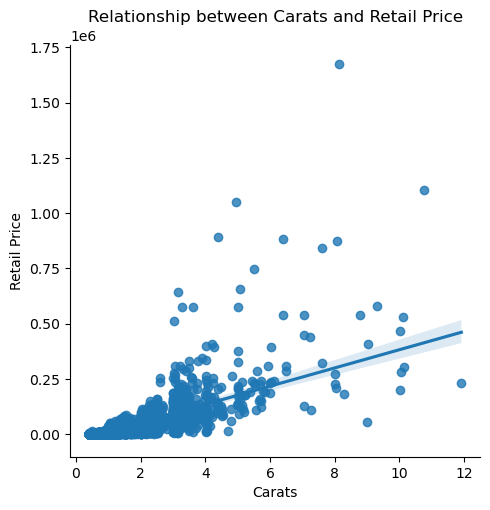

In [123]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='Carats', y='Retail', data=df_training, fit_reg=True)

# Add title and labels
plt.title('Relationship between Carats and Retail Price')
plt.xlabel('Carats')
plt.ylabel('Retail Price')

# Show the plot
plt.show()

The strong positive correlation between carat size and retail price indicates that carat weight is a critical determinant of a diamond's value. This relationship is shaped by economic principles, market perceptions, and the inherent rarity and desirability of larger diamonds.